<a href="https://colab.research.google.com/github/MagicMoleMM/ML/blob/main/TF_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
print(tf.__version__)

2.9.2


In [4]:
a = tf.Variable(10.)
b = tf.Variable(20.)

In [5]:
print(a*b)

tf.Tensor(200.0, shape=(), dtype=float32)


In [6]:
print(a+b)

tf.Tensor(30.0, shape=(), dtype=float32)


In [7]:
print(tf.exp(a))

tf.Tensor(22026.465, shape=(), dtype=float32)


In [8]:
model = tf.keras.Model()


In [9]:
from tensorflow.python.keras.layers import Dense, Input, Add
from tensorflow.python.keras import Model
import numpy as np


In [10]:
x = np.ones((4,3)) 
dense_layer = Dense(units=2, input_shape=(3,))
output = dense_layer(x)
print(f'Output: {output}')

Output: [[-1.6672882 -1.0715984]
 [-1.6672882 -1.0715984]
 [-1.6672882 -1.0715984]
 [-1.6672882 -1.0715984]]


In [11]:
w, b = dense_layer.get_weights()

print(f'Weights: {w}\nBias: {b}')

Weights: [[-0.39330602 -0.69312334]
 [-0.83293056  0.6634568 ]
 [-0.4410516  -1.0419319 ]]
Bias: [0. 0.]


In [12]:
manual_output = np.matmul(x,w) + b
print(f'Manual output - {manual_output}')

Manual output - [[-1.66728818 -1.07159841]
 [-1.66728818 -1.07159841]
 [-1.66728818 -1.07159841]
 [-1.66728818 -1.07159841]]


### **Sequential Model**

In [13]:
model = tf.keras.Sequential()
model.add(Dense(10, input_shape=(10,), activation='relu'))
model.add(Dense(20, activation='relu', 
                bias_initializer=tf.keras.initializers.Constant(2.0)))
model.add(Dense(5,activation='softmax'))

In [14]:
sample_input = np.random.rand(2,10)
output = model(sample_input)
output

<tf.Tensor: shape=(2, 5), dtype=float32, numpy=
array([[6.0542482e-01, 3.0497345e-04, 3.9343801e-01, 7.5315480e-04,
        7.8976656e-05],
       [6.3929975e-01, 3.1241495e-04, 3.5896820e-01, 1.3188022e-03,
        1.0089105e-04]], dtype=float32)>

In [15]:
model.layers[1].get_weights()[1]

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2.], dtype=float32)

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 module_wrapper (ModuleWrapp  (2, 10)                  110       
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (2, 20)                  220       
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (2, 5)                   105       
 pper)                                                           
                                                                 
Total params: 435
Trainable params: 435
Non-trainable params: 0
_________________________________________________________________


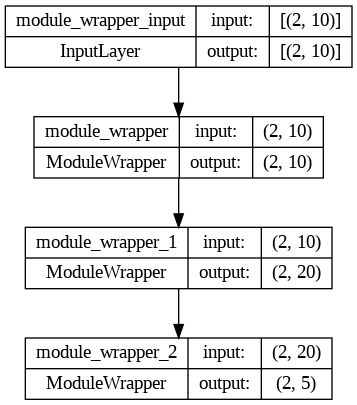

In [17]:
tf.keras.utils.plot_model(model, show_shapes=True)

## **Functional** **API**

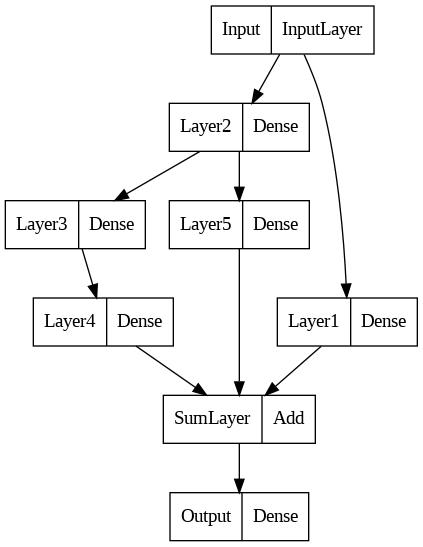

In [18]:
input_layer = Input(shape=(10, ), name='Input')

l1_output = Dense(10, name='Layer1')(input_layer)
l2_output = Dense(10, name='Layer2')(input_layer)
l3_output = Dense(10, name='Layer3')(l2_output)
l4_output = Dense(10, name='Layer4')(l3_output)
l5_output = Dense(10, name='Layer5')(l2_output)

sum_output = Add(name='SumLayer')([l1_output, l4_output, l5_output])
output = Dense(10, name='Output')(sum_output)

model = Model(inputs=input_layer, outputs=output)
tf.keras.utils.plot_model(model, show_shapes=False)

In [19]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input (InputLayer)              [(None, 10)]         0                                            
__________________________________________________________________________________________________
Layer2 (Dense)                  (None, 10)           110         Input[0][0]                      
__________________________________________________________________________________________________
Layer3 (Dense)                  (None, 10)           110         Layer2[0][0]                     
__________________________________________________________________________________________________
Layer1 (Dense)                  (None, 10)           110         Input[0][0]                      
______________________________________________________________________________________________

In [20]:
import numpy as np


In [21]:
y_true = np.random.rand(10)
y_pred = np.random.rand(10)

print(tf.keras.losses.MSE(y_true=y_true, y_pred=y_pred))

tf.Tensor(0.1409794508446127, shape=(), dtype=float64)


In [22]:
print(np.mean((y_true - y_pred)**2))

0.14097945084461272


In [23]:
print(tf.keras.losses.binary_crossentropy(np.ones(10), np.ones(10)))

tf.Tensor(0.0, shape=(), dtype=float64)


In [24]:
loss = tf.keras.losses.BinaryCrossentropy()
print(loss(np.ones(10), np.ones(10)))

tf.Tensor(0.0, shape=(), dtype=float64)


# **Обучение модели в TF**

# Задача регрессии

In [25]:
celsius = np.array([-10,-40,10,20,36,5,-12,14,36]).astype(np.float32)
fahrengeit = np.array([14.,-40.,50.,68.,96.8,41.,10.4,57.2,96.8])

In [26]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=(1,)))

optimazer = tf.keras.optimizers.Adam(learning_rate=0.5)
loss = tf.keras.losses.MSE

In [27]:
model.compile(optimizer=optimazer, loss=loss)


In [28]:
history = model.fit(celsius,fahrengeit,epochs=200,verbose=2)

Epoch 1/200
1/1 - 0s - loss: 7312.5068 - 429ms/epoch - 429ms/step
Epoch 2/200
1/1 - 0s - loss: 5498.0391 - 5ms/epoch - 5ms/step
Epoch 3/200
1/1 - 0s - loss: 3987.3936 - 4ms/epoch - 4ms/step
Epoch 4/200
1/1 - 0s - loss: 2781.8115 - 3ms/epoch - 3ms/step
Epoch 5/200
1/1 - 0s - loss: 1876.0933 - 6ms/epoch - 6ms/step
Epoch 6/200
1/1 - 0s - loss: 1256.0302 - 3ms/epoch - 3ms/step
Epoch 7/200
1/1 - 0s - loss: 895.8288 - 3ms/epoch - 3ms/step
Epoch 8/200
1/1 - 0s - loss: 756.2930 - 3ms/epoch - 3ms/step
Epoch 9/200
1/1 - 0s - loss: 785.2294 - 4ms/epoch - 4ms/step
Epoch 10/200
1/1 - 0s - loss: 921.4637 - 4ms/epoch - 4ms/step
Epoch 11/200
1/1 - 0s - loss: 1102.5405 - 5ms/epoch - 5ms/step
Epoch 12/200
1/1 - 0s - loss: 1274.0040 - 7ms/epoch - 7ms/step
Epoch 13/200
1/1 - 0s - loss: 1396.8030 - 4ms/epoch - 4ms/step
Epoch 14/200
1/1 - 0s - loss: 1450.3188 - 6ms/epoch - 6ms/step
Epoch 15/200
1/1 - 0s - loss: 1430.9365 - 4ms/epoch - 4ms/step
Epoch 16/200
1/1 - 0s - loss: 1347.8781 - 5ms/epoch - 5ms/step
E

In [29]:
model.get_weights()

[array([[1.7998732]], dtype=float32), array([32.01064], dtype=float32)]

In [30]:
import pandas as pd

history_df  = pd.DataFrame(history.history)
history_df

,loss
0,7312.506836
1,5498.039062
2,3987.393555
3,2781.811523
4,1876.093262
...,...
195,0.000161
196,0.000150
197,0.000138
198,0.000126


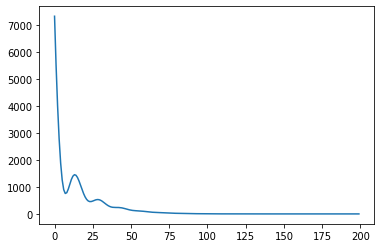

In [31]:
import matplotlib.pyplot as plt
plt.plot(history_df.loss)

# Задача классификации

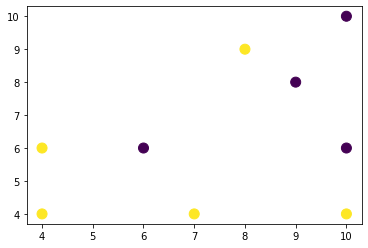

In [32]:
X = np.array([[10,6],[7,4],[6,6],[9,8],[10,10],[10,4],[4,4],[4,6],[8,9]])
y = np.array([0,1,0,0,0,1,1,1,1])
X[:,1]
plt.scatter(X[:,0],X[:,1],s=100, marker='o', c=y)

In [33]:
from tensorflow.python.keras.layers.core import activations
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(4, input_shape=(2,), activation="sigmoid"))
model.add(tf.keras.layers.Dense(1))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.05)
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)



In [34]:
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

history = model.fit(X,y,epochs=100, verbose=2)

Epoch 1/100
1/1 - 0s - loss: 0.6809 - accuracy: 0.4444 - 465ms/epoch - 465ms/step
Epoch 2/100
1/1 - 0s - loss: 0.6741 - accuracy: 0.5556 - 7ms/epoch - 7ms/step
Epoch 3/100
1/1 - 0s - loss: 0.6644 - accuracy: 0.5556 - 8ms/epoch - 8ms/step
Epoch 4/100
1/1 - 0s - loss: 0.6571 - accuracy: 0.5556 - 5ms/epoch - 5ms/step
Epoch 5/100
1/1 - 0s - loss: 0.6511 - accuracy: 0.5556 - 5ms/epoch - 5ms/step
Epoch 6/100
1/1 - 0s - loss: 0.6453 - accuracy: 0.5556 - 5ms/epoch - 5ms/step
Epoch 7/100
1/1 - 0s - loss: 0.6400 - accuracy: 0.5556 - 6ms/epoch - 6ms/step
Epoch 8/100
1/1 - 0s - loss: 0.6351 - accuracy: 0.6667 - 5ms/epoch - 5ms/step
Epoch 9/100
1/1 - 0s - loss: 0.6294 - accuracy: 0.6667 - 5ms/epoch - 5ms/step
Epoch 10/100
1/1 - 0s - loss: 0.6215 - accuracy: 0.6667 - 5ms/epoch - 5ms/step
Epoch 11/100
1/1 - 0s - loss: 0.6112 - accuracy: 0.6667 - 6ms/epoch - 6ms/step
Epoch 12/100
1/1 - 0s - loss: 0.6001 - accuracy: 0.6667 - 5ms/epoch - 5ms/step
Epoch 13/100
1/1 - 0s - loss: 0.5924 - accuracy: 0.7778 -

In [35]:
history_df_1 = pd.DataFrame(history.history)
history_df_1

,loss,accuracy
0,0.680941,0.444444
1,0.674123,0.555556
2,0.664361,0.555556
3,0.657109,0.555556
4,0.651116,0.555556
...,...,...
95,0.134429,1.000000
96,0.131749,1.000000
97,0.129135,1.000000
98,0.126584,1.000000


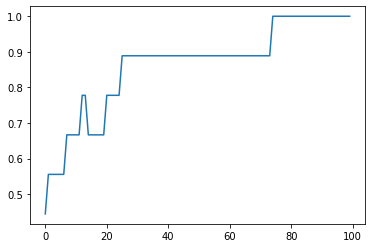

In [36]:
plt.plot(history_df_1.accuracy)

# **Практика**

In [37]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, Normalize
from sklearn.metrics import accuracy_score


%matplotlib inline
np.random.seed(10)

colors = ['red', "blue"]
labels_cmap = ListedColormap(colors, 2)
colors = [(1, 0, 0), (1, 1, 1), (0, 0, 1)]  # R -> W -> B
main_cmap = LinearSegmentedColormap.from_list("main_scheme", colors, N=300)

def show_data(X, y):
    plt.figure(figsize=(5, 5))
    plt.scatter(X[:, 0], X[:, 1], s=120, color=labels_cmap(y))
    

def show_descision_boundary(clf, limits, binary=False, X=None, y=None, n_lines=10, show_lines=False,
                           figsize=(5, 5), ax=None):
    if limits is None:
        if X is not None:
            xs = [X[:, 0].min() - .3, X[:, 0].max() + .3]
            ys = [X[:, 1].min() - .3, X[:, 1].max() + .3]
        else:
            xs = [-1, 1]
            ys = [-1, 1]
    else:
        xs, ys = limits
    
    x_min, x_max = xs
    y_min, y_max = ys
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    if ax is None:
        fig = plt.figure(figsize=figsize)
        ax = fig.add_subplot(1, 1, 1)
    
    if binary:
        Z = clf.predict(np.c_[xx.ravel(), xx.ravel()])
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        norm = Normalize(vmin=0.,vmax=1.)
    else:
        Z = clf(np.c_[xx.ravel(), xx.ravel()])
        Z = clf(np.c_[xx.ravel(), yy.ravel()])
        #if clf.prob_output:
        #    norm = Normalize(vmin=0.,vmax=1.)
        #else:
        norm = Normalize(vmin=-10.,vmax=10., clip=True)
        Z = Z.numpy() 
    
    Z = Z.reshape(xx.shape)
    Z = Z.astype(np.float32)
    
    ax.contourf(xx, yy, Z, n_lines, alpha=0.4, cmap=main_cmap, norm=norm)
    if show_lines:
        cp = ax.contour(xx, yy, Z, n_lines)
        ax.clabel(cp, inline=True, 
              fontsize=10, colors="green")
    
    if y is not None:
        X = np.array(X)
        y = np.array(y)
        ax.scatter(X[:, 0], X[:, 1], s=120, color=labels_cmap(y),
                   zorder=4)
        

def eval_model(model, X, y):
    accuracy = model.evaluate(X, y)[1]
    if accuracy == 1.0:
        print("Perfect!")
    elif  accuracy > 0.9:
        print("Well done! Can you make 100%?")
    else:
        print("Don't give up!")
    return accuracy

# Задача 1

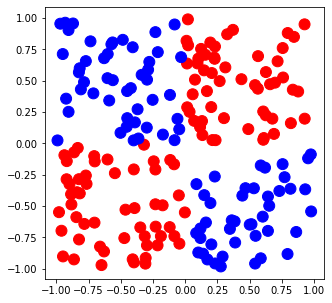

In [38]:
X = np.random.rand(200, 2) - 0.5
y = ((X[:, 0] < 0) ^ (X[:, 1] < 0))
X = X*2
show_data(X, y)

In [39]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(4, input_shape=(2,), activation="sigmoid"))
model.add(tf.keras.layers.Dense(4, activation="sigmoid"))
model.add(tf.keras.layers.Dense(4, activation="sigmoid"))
model.add(tf.keras.layers.Dense(1))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.05)
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [40]:
model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"]) 
history = model.fit(X, y, epochs=200, verbose=1, batch_size=64, shuffle=True)

Epoch 1/200
4/4 [==============================] - 1s 3ms/step - loss: 0.6945 - accuracy: 0.5450
Epoch 2/200
4/4 [==============================] - 0s 3ms/step - loss: 0.6989 - accuracy: 0.5450
Epoch 3/200
4/4 [==============================] - 0s 3ms/step - loss: 0.6902 - accuracy: 0.5450
Epoch 4/200
4/4 [==============================] - 0s 3ms/step - loss: 0.6900 - accuracy: 0.5450
Epoch 5/200
4/4 [==============================] - 0s 4ms/step - loss: 0.6909 - accuracy: 0.5450
Epoch 6/200
4/4 [==============================] - 0s 3ms/step - loss: 0.6936 - accuracy: 0.5450
Epoch 7/200
4/4 [==============================] - 0s 3ms/step - loss: 0.6905 - accuracy: 0.5450
Epoch 8/200
4/4 [==============================] - 0s 3ms/step - loss: 0.6917 - accuracy: 0.5450
Epoch 9/200
4/4 [==============================] - 0s 3ms/step - loss: 0.6906 - accuracy: 0.5450
Epoch 10/200
4/4 [==============================] - 0s 3ms/step - loss: 0.6903 - accuracy: 0.5450
Epoch 11/200
4/4 [===========

7/7 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 1.0000
Perfect!


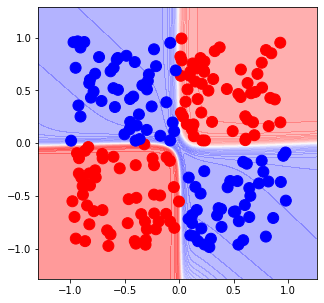

In [41]:
limits = [[-0.6, 0.6], [-0.6, 0.6]]
eval_model(model, X, y)
show_descision_boundary(limits=None, clf=model, binary=False,
                                X=X,
                                y=y, 
                                n_lines=50,
                                show_lines=False)

In [42]:
history_df_2 = pd.DataFrame(history.history)
history_df_2

,loss,accuracy
0,0.694481,0.545
1,0.698880,0.545
2,0.690220,0.545
3,0.690011,0.545
4,0.690927,0.545
...,...,...
195,0.002052,1.000
196,0.002054,1.000
197,0.002005,1.000
198,0.001953,1.000


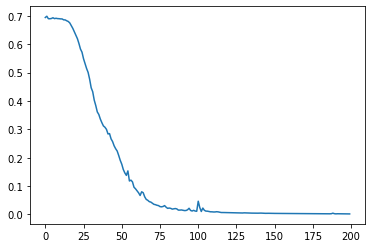

In [43]:
plt.plot(history_df_2.loss)

# Задача 2

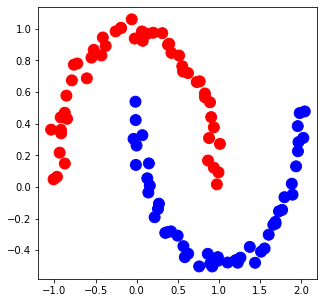

In [44]:
from sklearn.datasets import make_moons

X, y = make_moons(noise=0.04)
show_data(X, y)

In [45]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(15, input_shape=(2,), activation="relu"))
model.add(tf.keras.layers.Dense(15, activation="relu"))
model.add(tf.keras.layers.Dense(15, activation="relu"))
model.add(tf.keras.layers.Dense(1))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.05)
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [46]:
model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"]) 
history = model.fit(X, y, epochs=200, verbose=1, batch_size=64, shuffle=True)

Epoch 1/200
2/2 [==============================] - 0s 7ms/step - loss: 0.6874 - accuracy: 0.5000
Epoch 2/200
2/2 [==============================] - 0s 6ms/step - loss: 0.5728 - accuracy: 0.7000
Epoch 3/200
2/2 [==============================] - 0s 6ms/step - loss: 0.4262 - accuracy: 0.8400
Epoch 4/200
2/2 [==============================] - 0s 6ms/step - loss: 0.3098 - accuracy: 0.8600
Epoch 5/200
2/2 [==============================] - 0s 6ms/step - loss: 0.2711 - accuracy: 0.8600
Epoch 6/200
2/2 [==============================] - 0s 6ms/step - loss: 0.2634 - accuracy: 0.8800
Epoch 7/200
2/2 [==============================] - 0s 16ms/step - loss: 0.2383 - accuracy: 0.8800
Epoch 8/200
2/2 [==============================] - 0s 5ms/step - loss: 0.2927 - accuracy: 0.8800
Epoch 9/200
2/2 [==============================] - 0s 5ms/step - loss: 0.2375 - accuracy: 0.8500
Epoch 10/200
2/2 [==============================] - 0s 11ms/step - loss: 0.2385 - accuracy: 0.8500
Epoch 11/200
2/2 [=========

4/4 [==============================] - 0s 3ms/step - loss: 9.7886e-06 - accuracy: 1.0000
Perfect!


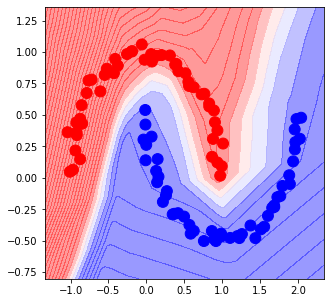

In [47]:
eval_model(model, X, y)
show_descision_boundary(limits=None, clf=model, binary=False,
                                X=X,
                                y=y, 
                                n_lines=50,
                                show_lines=False)

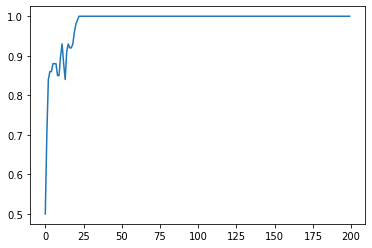

In [48]:
history_df_3 = pd.DataFrame(history.history)
plt.plot(history_df_3.accuracy)

# Задача 3

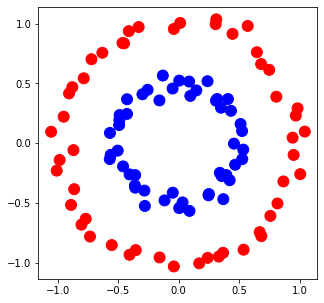

In [49]:
from sklearn.datasets import make_circles

X, y = make_circles(factor=0.5, noise=0.05)
show_data(X, y)

In [50]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(4, input_shape=(2,), activation="relu"))
#model.add(tf.keras.layers.Dense(2, activation="relu"))
#model.add(tf.keras.layers.Dense(3, activation="relu"))
model.add(tf.keras.layers.Dense(1))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.05)
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [51]:
model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"]) 
history = model.fit(X, y, epochs=200, verbose=1, batch_size=64, shuffle=True)

Epoch 1/200
2/2 [==============================] - 0s 5ms/step - loss: 0.6679 - accuracy: 0.5000
Epoch 2/200
2/2 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.5000
Epoch 3/200
2/2 [==============================] - 0s 5ms/step - loss: 0.6389 - accuracy: 0.5000
Epoch 4/200
2/2 [==============================] - 0s 5ms/step - loss: 0.6253 - accuracy: 0.5000
Epoch 5/200
2/2 [==============================] - 0s 7ms/step - loss: 0.6099 - accuracy: 0.5000
Epoch 6/200
2/2 [==============================] - 0s 5ms/step - loss: 0.5975 - accuracy: 0.5000
Epoch 7/200
2/2 [==============================] - 0s 5ms/step - loss: 0.5845 - accuracy: 0.5000
Epoch 8/200
2/2 [==============================] - 0s 4ms/step - loss: 0.5705 - accuracy: 0.5000
Epoch 9/200
2/2 [==============================] - 0s 5ms/step - loss: 0.5551 - accuracy: 0.5000
Epoch 10/200
2/2 [==============================] - 0s 5ms/step - loss: 0.5369 - accuracy: 0.4800
Epoch 11/200
2/2 [===========

4/4 [==============================] - 0s 4ms/step - loss: 0.0374 - accuracy: 1.0000
Perfect!
Bonus points!


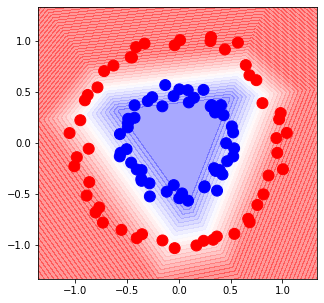

In [52]:
accuracy = eval_model(model, X, y)
if model.count_params() < 18 and accuracy == 1.0:
    print("Bonus points!")
else:
    print(f"Model has {model.count_params()} parameters")

show_descision_boundary(limits=None, clf=model, binary=False,
                                X=X,
                                y=y, 
                                n_lines=50,
                                show_lines=False)

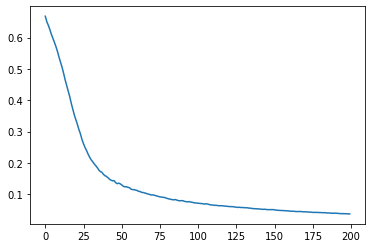

In [53]:
history_df_4 = pd.DataFrame(history.history)
plt.plot(history_df_4.loss)

# **Сохранение и загрузка моделей**

In [54]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv

--2023-01-25 09:06:24--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23278 (23K) [text/plain]
Saving to: ‘pima-indians-diabetes.data.csv.1’

pima-indians-diabet 100%[===================>]  22.73K  --.-KB/s    in 0.001s  

2023-01-25 09:06:24 (29.1 MB/s) - ‘pima-indians-diabetes.data.csv.1’ saved [23278/23278]



In [56]:
dataset = pd.read_csv('pima-indians-diabetes.data.csv', header=None)
dataset.columns = ['number_times_pregnant','plasma_glucose_concent',
                  'blood_pressure','skin_sickness','insulin','BMI','diabetes_pedigree',
                  'age','has_diabetes']
dataset

,number_times_pregnant,plasma_glucose_concent,blood_pressure,skin_sickness,insulin,BMI,diabetes_pedigree,age,has_diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [59]:
from sklearn.model_selection import train_test_split

np.random.seed(10)
X = dataset.drop(['has_diabetes'], axis=1).values
y = dataset['has_diabetes'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(f'Train shape: {X_train.shape}, Test shape: {X_test.shape}, Label ratio: {y_train.mean():.2f}')



Train shape: (614, 8), Test shape: (154, 8), Label ratio: 0.34


In [141]:
from tensorflow.python.keras.mixed_precision.loss_scale_optimizer import optimizers
def get_compiled_model():
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(24, input_dim=8, activation='relu'))
  model.add(tf.keras.layers.Dense(24, activation='relu'))
  model.add(tf.keras.layers.Dense(24, activation='relu'))
  model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
  optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model

model = get_compiled_model()
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=150, batch_size=64, verbose=1)


ValueError: ignored

In [86]:
from pathlib import Path
path = Path('/Users/magicmole/Downloads/model_1')
path.mkdir(parents=True,exist_ok=True)
cpt_filename = '{epoch:02d}_chekpoint_{val_accuracy:.2f}.hdf5'
cpt_path = str(path / cpt_filename)

checkpoint = tf.keras.callbacks.ModelCheckpoint(cpt_path,monitor='val_accuracy', verbose=1, 
                                                save_best_only=True,
                                                mode='max')


In [87]:
for epoch in range(4):
  print(cpt_path.format(epoch=epoch, val_accuracy=np.random.rand()))

/Users/magicmole/Downloads/model_1/00_chekpoint_0.99.hdf5
/Users/magicmole/Downloads/model_1/01_chekpoint_0.78.hdf5
/Users/magicmole/Downloads/model_1/02_chekpoint_0.94.hdf5
/Users/magicmole/Downloads/model_1/03_chekpoint_0.29.hdf5


In [88]:
model = get_compiled_model()
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=150, batch_size=64, verbose=0, callbacks=[checkpoint])


Epoch 1: val_accuracy improved from -inf to 0.62338, saving model to /Users/magicmole/Downloads/model_1/01_chekpoint_0.62.hdf5

Epoch 2: val_accuracy improved from 0.62338 to 0.64286, saving model to /Users/magicmole/Downloads/model_1/02_chekpoint_0.64.hdf5

Epoch 3: val_accuracy improved from 0.64286 to 0.66883, saving model to /Users/magicmole/Downloads/model_1/03_chekpoint_0.67.hdf5

Epoch 4: val_accuracy improved from 0.66883 to 0.67532, saving model to /Users/magicmole/Downloads/model_1/04_chekpoint_0.68.hdf5

Epoch 5: val_accuracy improved from 0.67532 to 0.68182, saving model to /Users/magicmole/Downloads/model_1/05_chekpoint_0.68.hdf5

Epoch 6: val_accuracy improved from 0.68182 to 0.68831, saving model to /Users/magicmole/Downloads/model_1/06_chekpoint_0.69.hdf5

Epoch 7: val_accuracy did not improve from 0.68831

Epoch 8: val_accuracy did not improve from 0.68831

Epoch 9: val_accuracy did not improve from 0.68831

Epoch 10: val_accuracy improved from 0.68831 to 0.69481, sav

In [90]:
!ls '/Users/magicmole/Downloads/model_1'

01_chekpoint_0.55.hdf5	06_chekpoint_0.66.hdf5	 21_chekpoint_0.70.hdf5
01_chekpoint_0.62.hdf5	06_chekpoint_0.69.hdf5	 26_chekpoint_0.73.hdf5
02_chekpoint_0.62.hdf5	09_chekpoint_0.67.hdf5	 43_chekpoint_0.75.hdf5
02_chekpoint_0.64.hdf5	108_chekpoint_0.76.hdf5  48_chekpoint_0.73.hdf5
03_chekpoint_0.67.hdf5	10_chekpoint_0.68.hdf5	 64_chekpoint_0.75.hdf5
04_chekpoint_0.66.hdf5	10_chekpoint_0.69.hdf5	 80_chekpoint_0.77.hdf5
04_chekpoint_0.68.hdf5	15_chekpoint_0.70.hdf5
05_chekpoint_0.68.hdf5	16_chekpoint_0.71.hdf5


# **Домашнее задание**

In [122]:
#@title 
def show_mnist(images, labels, predicted_labels=None):
    plt.figure(figsize=(10,10))
    for i in range(16):
        plt.subplot(4,4, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.gray)
        if predicted_labels is not None:
            title_obj = plt.title(f"Real: {labels[i]}. Pred: {predicted_labels[i]}")
            if labels[i] != predicted_labels[i]:
                plt.setp(title_obj, color='r')
        else:
            plt.title(f"Real label: {labels[i]}")

def show_progress(history: dict):
    plt.figure(figsize=(10, 5))
    ax1 = plt.subplot(1,2,1)    
    plt.plot(history["accuracy"],label='train accuracy')
    plt.plot(history["val_accuracy"], label='test accuracy')
    ax2 = plt.subplot(1,2,2)
    plt.plot(history["loss"],label='train_loss')
    plt.plot(history["val_loss"],label='test_loss')
    
    ax1.legend(loc='best')
    ax2.legend(loc='best')
    plt.grid()
    plt.tight_layout()
    plt.show()

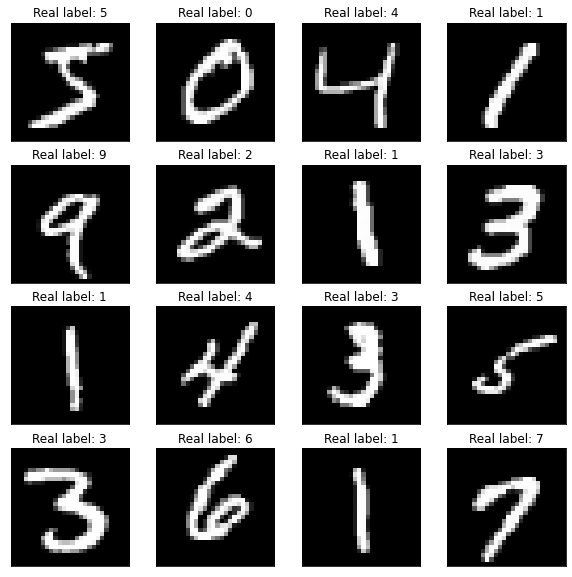

In [105]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train /255.0, x_test / 255.0
show_mnist(x_train,y_train)
x_train = x_train.reshape((-1,28*28))
x_test = x_test.reshape((-1,28*28))


In [106]:
# прикрепим гугл диск к виртуальной машине
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [110]:
path = Path("/content/drive/My Drive/Skillbox/model_1")
path.mkdir(exist_ok=True, parents=True) # папка создается на вашем гугл диске. вместе с "родителями"
assert path.exists()
cpt_filename = "best_checkpoint.hdf5"  
cpt_path =str(path / cpt_filename)
# После выполнения на гугл диске должна создаться папка: Skillbox/model_1

checkpoint = tf.keras.callbacks.ModelCheckpoint(cpt_path,monitor='val_accuracy', verbose=1, 
                                                save_best_only=True,
                                                mode='max')

In [143]:
from tensorflow.python.keras.mixed_precision.loss_scale_optimizer import optimizers
def get_compiled_model_1():
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(128, input_dim=28*28, activation='relu'))
  #model.add(tf.keras.layers.Dense(128, activation='relu'))
  #model.add(tf.keras.layers.Dense(24, activation='relu'))
  model.add(tf.keras.layers.Dense(10, activation='softmax'))
  optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)
  model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model

model = get_compiled_model_1()
history = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=150, batch_size=64, verbose=1, callbacks=[checkpoint])

Epoch 1/150
935/938 [============================>.] - ETA: 0s - loss: 0.2190 - accuracy: 0.9337
Epoch 1: val_accuracy did not improve from 0.97720
938/938 [==============================] - 3s 3ms/step - loss: 0.2187 - accuracy: 0.9338 - val_loss: 0.1785 - val_accuracy: 0.9528
Epoch 2/150
925/938 [============================>.] - ETA: 0s - loss: 0.1317 - accuracy: 0.9611
Epoch 2: val_accuracy did not improve from 0.97720
938/938 [==============================] - 3s 3ms/step - loss: 0.1320 - accuracy: 0.9611 - val_loss: 0.1283 - val_accuracy: 0.9636
Epoch 3/150
937/938 [============================>.] - ETA: 0s - loss: 0.1107 - accuracy: 0.9679
Epoch 3: val_accuracy did not improve from 0.97720
938/938 [==============================] - 3s 3ms/step - loss: 0.1107 - accuracy: 0.9679 - val_loss: 0.1416 - val_accuracy: 0.9637
Epoch 4/150
930/938 [============================>.] - ETA: 0s - loss: 0.1009 - accuracy: 0.9712
Epoch 4: val_accuracy did not improve from 0.97720
938/938 [======

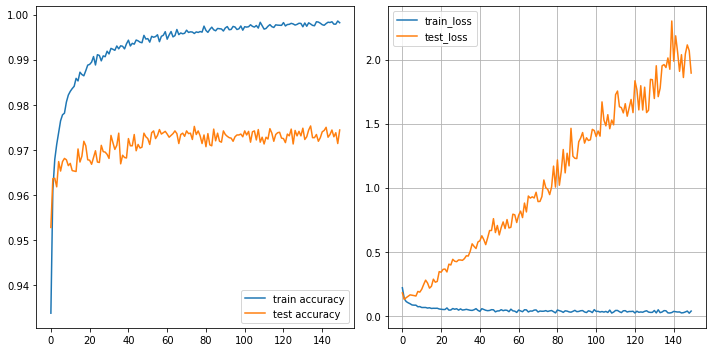

In [144]:
show_progress(history.history)

In [145]:
restored_model = tf.keras.models.load_model(cpt_path)
loss, acc = restored_model.evaluate(x_test, y_test)
print(f"Accuracy of restored model {acc*100 :.2f}%")
assert acc > 0.96

313/313 [==============================] - 1s 2ms/step - loss: 1.9553 - accuracy: 0.9772
Accuracy of restored model 97.72%


313/313 [==============================] - 1s 1ms/step


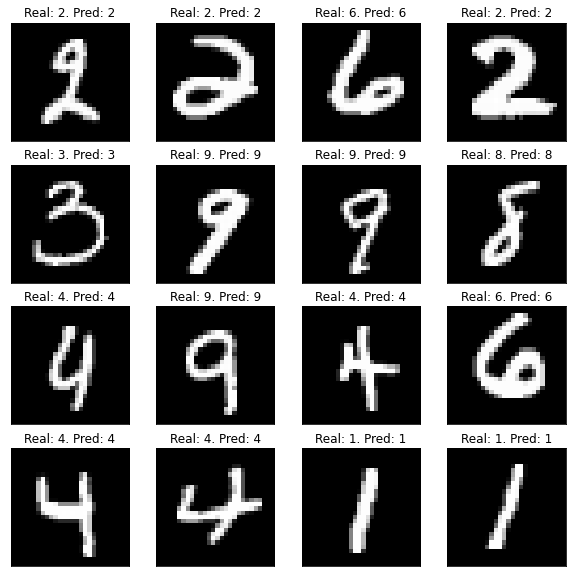

In [146]:
y_predict = np.argmax(model.predict(x_test), axis=-1)
idxs = np.random.choice(np.arange(len(x_test)), 16, replace=False)
show_mnist(x_test[idxs].reshape((-1, 28, 28)), y_test[idxs], y_predict[idxs])

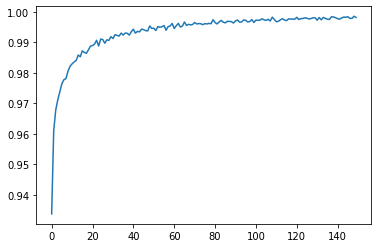

In [147]:
history_df_5 = pd.DataFrame(history.history)
plt.plot(history_df_5.accuracy)

In [148]:
assert len(list(path.glob("*"))) != 0, f"Checkpoint dir {path}"
assert "accuracy" in history.history, "History object must contain Accuracy. Please, retrain with this metric"
assert "val_accuracy" in history.history, "Please, provide validation_data in model.fit."
assert np.max(history.history["val_accuracy"]) > 0.95, "Validation accuracy must be more than 0.95"
# Для старой версии (tf.__version__ == 1.x) запустить aseert-ы ниже:
# assert "acc" in history.history, "History object must contain Accuracy. Please, retrain with this metric"
# assert "val_acc" in history.history, "Please, provide validation_data in model.fit."
# assert np.max(history.history["val_acc"]) > 0.95, "Validation accuracy must be more than 0.95"
print("Training tests passed")

Training tests passed
